<a href="https://colab.research.google.com/github/nosovdmitry007/YOLO-4/blob/main/%D0%9D%D0%B0%D0%B1%D0%BE%D1%80_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85_%D0%B0%D0%B2%D1%82%D0%BE%D0%BC%D0%BE%D0%B1%D0%B8%D0%BB%D1%8C%D0%BD%D1%8B%D1%85_%D0%BD%D0%BE%D0%BC%D0%B5%D1%80%D0%BE%D0%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Набор обучающих данных
Я выполнил следующие команды в наборе инструментов, чтобы создать свой собственный набор обучающих данных. Я решил использовать 1500 изображений в своем наборе данных, но общее правило таково: чем больше изображений, тем лучше для повышения точности вашей модели.



In [ ]:
!git clone https://github.com/theAIGuysCode/OIDv4_ToolKit.git

Cloning into 'OIDv4_ToolKit'...
remote: Enumerating objects: 444, done.
remote: Total 444 (delta 0), reused 0 (delta 0), pack-reused 444
Receiving objects: 100% (444/444), 34.09 MiB | 12.64 MiB/s, done.
Resolving deltas: 100% (157/157), done.


In [ ]:
%cd OIDv4_ToolKit
!pip install -r requirements.txt

/content/OIDv4_ToolKit
     |████████████████████████████████| 3.8 MB 4.1 MB/s 
     |████████████████████████████████| 8.5 MB 43.1 MB/s 
     |████████████████████████████████| 79 kB 8.1 MB/s 
     |████████████████████████████████| 547 kB 67.4 MB/s 
     |████████████████████████████████| 138 kB 58.0 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: rsa
    Found existing installation: rsa 4.8
    Uninstalling rsa-4.8:
      Successfully uninstalled rsa-4.8
  Attempting uninstall: docutils
    Found existing installation: docutils 0.17.1
    Uninstalling docutils-0.17.1:
      Successfully uninstalled docutils-0.17.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1

In [ ]:
!python main.py downloader --classes 'Vehicle registration plate' --type_csv train --limit 1500


		   ___   _____  ______            _    _    
		 .'   `.|_   _||_   _ `.         | |  | |   
		/  .-.  \ | |    | | `. \ _   __ | |__| |_  
		| |   | | | |    | |  | |[ \ [  ]|____   _| 
		\  `-'  /_| |_  _| |_.' / \ \/ /     _| |_  
		 `.___.'|_____||______.'   \__/     |_____|
	

             _____                    _                 _             
            (____ \                  | |               | |            
             _   \ \ ___  _ _ _ ____ | | ___   ____  _ | | ____  ____ 
            | |   | / _ \| | | |  _ \| |/ _ \ / _  |/ || |/ _  )/ ___)
            | |__/ / |_| | | | | | | | | |_| ( ( | ( (_| ( (/ /| |    
            |_____/ \___/ \____|_| |_|_|\___/ \_||_|\____|\____)_|    
                                                          
        
    [INFO] | Downloading Vehicle registration plate.
   [ERROR] | Missing the class-descriptions-boxable.csv file.
[DOWNLOAD] | Do you want to download the missing file? [Y/n] Y
...145%, 0 MB, 46764 KB/s, 0 seconds passed

**Примечание: Если вы тренируете детектор для нескольких классов, добавьте "--multiclasses 1" в приведенную выше команду, чтобы все ваши обучающие изображения были сохранены вместе в одной папке.**

Это создает папку с 1500 изображениями "номерных знаков транспортных средств" (номерных знаков), с помощью которых мы можем обучить наш пользовательский детектор объектов.

## Набор данных для проверки
**Примечание:** Наличие набора данных для проверки необязательно, но настоятельно рекомендуется.

Мы хотим иметь набор данных для проверки, чтобы правильно протестировать наш пользовательский детектор объектов после его обучения. Мы можем воспользоваться преимуществами OIDv4_Toolkit, поскольку в нем есть отдельные изображения для проверки, чтобы убедиться, что у нас разные изображения, а не те, которые есть в нашем обучающем наборе данных.

Мы можем выполнить те же команды, что и выше, но для проверки. Я рекомендую иметь размер набора данных для проверки, который составляет примерно 20-30% от размера вашего обучающего набора данных.
Поскольку я выбрал 1500 изображений для своих обучающих данных, это означает, что у меня будет размер проверки 300 изображений. (20% от 1500 = 300)




In [ ]:
!python main.py downloader --classes 'Vehicle registration plate' --type_csv validation --limit 300


		   ___   _____  ______            _    _    
		 .'   `.|_   _||_   _ `.         | |  | |   
		/  .-.  \ | |    | | `. \ _   __ | |__| |_  
		| |   | | | |    | |  | |[ \ [  ]|____   _| 
		\  `-'  /_| |_  _| |_.' / \ \/ /     _| |_  
		 `.___.'|_____||______.'   \__/     |_____|
	

             _____                    _                 _             
            (____ \                  | |               | |            
             _   \ \ ___  _ _ _ ____ | | ___   ____  _ | | ____  ____ 
            | |   | / _ \| | | |  _ \| |/ _ \ / _  |/ || |/ _  )/ ___)
            | |__/ / |_| | | | | | | | | |_| ( ( | ( (_| ( (/ /| |    
            |_____/ \___/ \____|_| |_|_|\___/ \_||_|\____|\____)_|    
                                                          
        
    [INFO] | Downloading Vehicle registration plate.
   [ERROR] | Missing the validation-annotations-bbox.csv file.
[DOWNLOAD] | Do you want to download the missing file? [Y/n] Y
...100%, 16 MB, 28808 KB/s, 0 seconds pass

Теперь у нас есть надлежащий набор данных для проверки вашего пользовательского детектора объектов после обучения!

### Преобразование меток в формат YOLOv4
Метки, которые мы получаем из набора инструментов, не в правильном формате YOLOv4. К счастью, с помощью нескольких простых команд мы можем преобразовать их в нужный формат.

В корневой папке OIDv4_ToolKit откройте файл classes.txt и отредактируйте его, чтобы в нем были классы, которые вы только что скачали, по одному на строку.

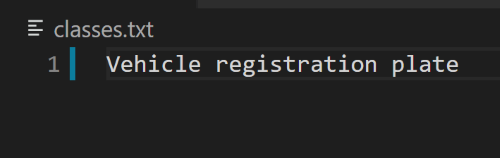

Пример classes.txt для детектора многоклассовых объектов:

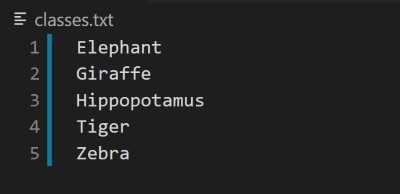

Теперь запустите эту команду, чтобы преобразовать метки, сгенерированные OIDv4_Toolkit, в метки yolov4 (это должно преобразовать метки как обучающего, так и проверочного набора данных).:
```
python convert_annotations.py
```

Это преобразует все метки в формат YOLOv4, который теперь может использоваться darknet для правильной подготовки нашего пользовательского детектора объектов.

Удалите старую папку "Label" в папках "Train" и "validation", содержащую ярлыки в формате, отличном от YOLOv4, выполнив следующее: (путь к файлу будет иметь другое имя для "Регистрационный знак транспортного средства"... в зависимости от того, какие классы вы скачали.
```
rm -r OID/Dataset/train/'Vehicle registration plate'/Label/
```
И, наконец, удалите старые метки для проверки.
```
rm -r OID/Dataset/validation/'Vehicle registration plate'/Label/
```
Если эта команда не работает на вашем компьютере, просто перейдите в папку с надписью "Label", щелкните правой кнопкой мыши и нажмите "Удалить", чтобы удалить ее вручную.

Папки со всеми вашими изображениями и аннотациями теперь должны выглядеть так. Рядом с каждым изображением (или под ним) должен быть текстовый файл с тем же именем.

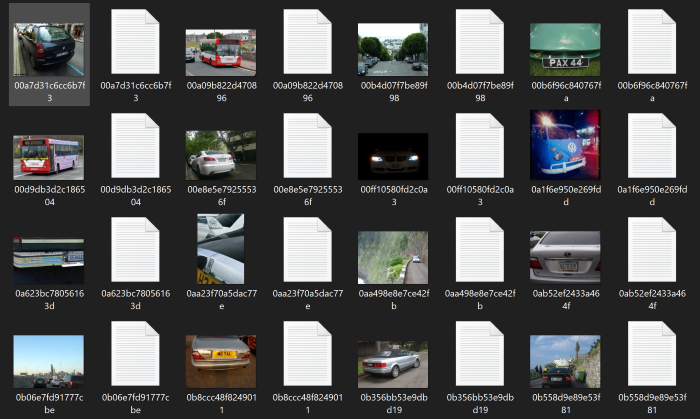

## Теперь у вас есть собственные наборы данных для обучения и проверки YOLOv4 с соответствующими метками!

In [ ]:
!python convert_annotations.py

Currently in subdirectory: validation
Converting annotations for class:  Vehicle registration plate
100% 300/300 [00:06<00:00, 45.52it/s]
Currently in subdirectory: train
Converting annotations for class:  Vehicle registration plate
100% 1500/1500 [00:34<00:00, 43.63it/s]


In [ ]:
!rm -r OID/Dataset/train/'Vehicle registration plate'/Label/

In [ ]:
!rm -r OID/Dataset/validation/'Vehicle registration plate'/Label/

# Архивируем и сохраняем на Google диск

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import shutil
shutil.make_archive( '/content/drive/MyDrive/yolov4/obj', 'zip','/content/OIDv4_ToolKit/OID/Dataset/train/Vehicle registration plate/')

'/content/drive/MyDrive/yolov4/obj.zip'

In [ ]:
shutil.make_archive( '/content/drive/MyDrive/yolov4/test', 'zip','/content/OIDv4_ToolKit/OID/Dataset/validation/Vehicle registration plate/')

'/content/drive/MyDrive/yolov4/test.zip'